In [1]:
import numpy as np, plottools as pl, local, tools_cmb, quad_func, binning as bn, analysis as ana
from matplotlib.pyplot import *
import warnings
warnings.filterwarnings("ignore")

In [66]:
def plot_spec(qobj,w=np.ones(5),rlz=None,cn=1,lmin=40,lmax=2048,bnum=10,scale=1.):
    mb = bn.multipole_binning(bnum,lmin=lmin,lmax=lmax)
    Skk, Okk = local.load_spec(qobj,mb,rlz=rlz,cn=cn)
    Mkk = np.mean(Skk,axis=0)
    Vkk = np.std(Skk,axis=0)
    if rlz is not None:
        skk, okk = local.load_spec(qobj,mb,rlz=None,cn=cn)
        vkk = np.std(skk,axis=0)
        print(Vkk/vkk)
    st0 = ana.PTEs(Okk,Skk,x1pte=True)
    st1 = ana.PTEs(Okk,Skk,x1pte=True,diag=True)
    # plot binned spectrum lin-scale
    pl.plot_1dstyle(fsize=[10,4],xmin=mb.lmin,xmax=lmax,ymin=-1.,ymax=1.6,ylab='$10^2L^{0.5}C_L^{\kappa\kappa}$')
    errorbar(mb.bc-5,mb.bc**0.5*(Okk-Mkk)/w[4]*1e6*scale,yerr=mb.bc**0.5*Vkk/w[4]*1e6*scale,fmt='o')
    plot(aobj.l,aobj.l**0.5*aobj.ckk*1e6*scale,color='k',ls='--')
    #figtext(.7,.80,r'$\chi$-PTE:'+str(np.round(st0.px1,2)))
    figtext(.7,.75,r'$\chi^2$-PTE:'+str(np.round(st0.px2,2)))
    figtext(.7,.70,r'$\chi^2$-PTE (diag):'+str(np.round(st1.px2,2)))
    axhline(0,color='k')
    show()

In [73]:
qids = ['boss_01','boss_02','boss_03','boss_04']
#qids = ['boss_02','boss_03','boss_04']
dirs = local.data_directory()
qobj, Qobj = {}, {}
for q in qids:
    aobj = local.init_analysis_params(qid='diff_'+q,ascale=3.,wtype='iso15v3PT')
    qobj[q] = quad_func.reconstruction(dirs['local'],aobj.ids,stag=aobj.stag,rlmin=500,qlist=['TT'],bhe=['src'])
    Qobj[q] = quad_func.reconstruction(dirs['local'],aobj.ids,stag=aobj.stag,rlmin=500,qlist=['TT'])
# combined
for wtype in ['iso15vcpt','iso15v3pt','iso15v3PT','iso15V3PT']:
    aobj = local.init_analysis_params(qid='diff_dn',ascale=3.,wtype=wtype)
    qobj[wtype] = quad_func.reconstruction(dirs['local'],aobj.ids,stag=aobj.stag,rlmin=500,qlist=['TT'],bhe=['src'])
    Qobj[wtype] = quad_func.reconstruction(dirs['local'],aobj.ids,stag=aobj.stag,rlmin=500,qlist=['TT'])

In [61]:
w = {wtype: tools_cmb.get_wfactors(['diff_dn'],3.,wtype=wtype)['diff_dn'] for wtype in ['iso15vcpt','iso15v3pt','iso15v3PT']}

wfactors: [2.64551209e-02 4.43198474e-08 1.08375184e-13 2.89033159e-19
 8.10469432e-25]
wfactors: [2.64897241e-02 7.90728095e-07 3.63343224e-11 1.90522948e-15
 1.09009040e-19]
wfactors: [2.47789282e-02 6.91236469e-07 3.10845873e-11 1.60908806e-15
 9.12069538e-20]


chi: 58.6 , chi (sim mean): 0.0 , chi (sim std): 5.1 , PTE: 0.00 
chi^2: 160.3 , chi^2 (sim): 11.2 , PTE: 0.00 
chi: 58.6 , chi (sim mean): 0.0 , chi (sim std): 5.1 , PTE: 0.00 
chi^2: 352.3 , chi^2 (sim): 11.2 , PTE: 0.00 


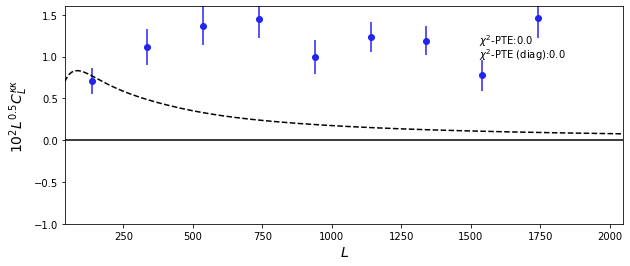

In [75]:
plot_spec(qobj['iso15v3pt'],scale=.5)

chi: 5.2 , chi (sim mean): 0.0 , chi (sim std): 5.2 , PTE: 0.28 
chi^2: 29.9 , chi^2 (sim): 11.1 , PTE: 0.01 
chi: 5.2 , chi (sim mean): 0.0 , chi (sim std): 5.2 , PTE: 0.28 
chi^2: 19.4 , chi^2 (sim): 11.1 , PTE: 0.07 


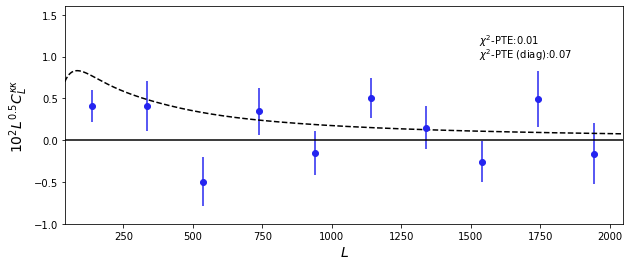

In [85]:
plot_spec(Qobj['iso15V3PT'],scale=.5)

chi: 4.7 , chi (sim mean): 0.0 , chi (sim std): 5.7 , PTE: 0.38 
chi^2: 15.3 , chi^2 (sim): 11.1 , PTE: 0.18 
chi: 4.7 , chi (sim mean): 0.0 , chi (sim std): 5.7 , PTE: 0.38 
chi^2: 10.6 , chi^2 (sim): 11.1 , PTE: 0.52 


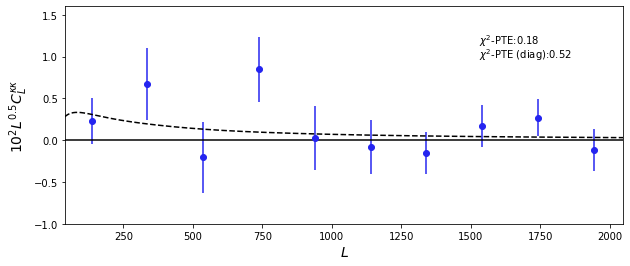

chi: 8.1 , chi (sim mean): 0.0 , chi (sim std): 5.3 , PTE: 0.10 
chi^2: 22.1 , chi^2 (sim): 11.1 , PTE: 0.01 
chi: 8.1 , chi (sim mean): 0.0 , chi (sim std): 5.3 , PTE: 0.10 
chi^2: 22.5 , chi^2 (sim): 11.1 , PTE: 0.01 


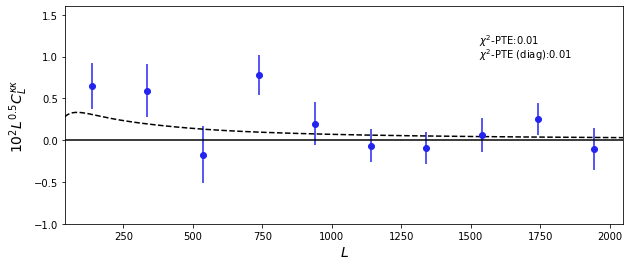

In [67]:
plot_spec(qobj['boss_03'],bnum=10,scale=.2)
plot_spec(Qobj['boss_03'],bnum=10,scale=.2)

chi: 19.7 , chi (sim mean): -0.0 , chi (sim std): 5.3 , PTE: 0.00 
chi^2: 30.4 , chi^2 (sim): 11.1 , PTE: 0.00 
chi: 19.7 , chi (sim mean): -0.0 , chi (sim std): 5.3 , PTE: 0.00 
chi^2: 50.0 , chi^2 (sim): 11.1 , PTE: 0.00 


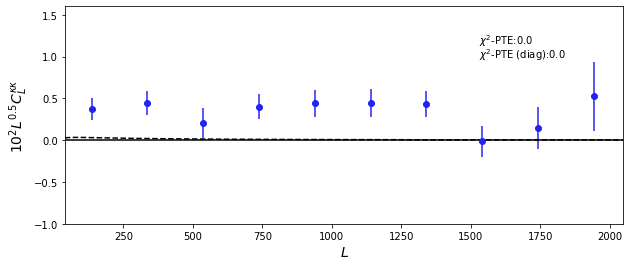

chi: 10.2 , chi (sim mean): 0.0 , chi (sim std): 4.8 , PTE: 0.04 
chi^2: 24.1 , chi^2 (sim): 11.1 , PTE: 0.02 
chi: 10.2 , chi (sim mean): 0.0 , chi (sim std): 4.8 , PTE: 0.04 
chi^2: 21.3 , chi^2 (sim): 11.1 , PTE: 0.02 


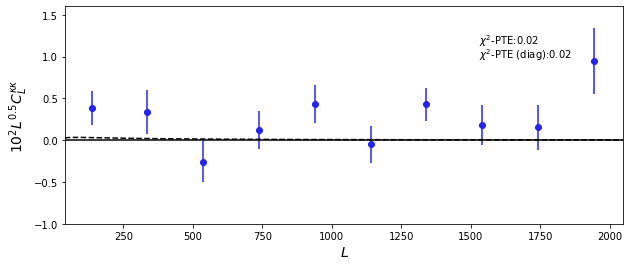

In [77]:
#plot_spec(qobj['boss_01'],bnum=10,scale=.001)
plot_spec(Qobj['boss_02'],bnum=10,scale=.02)
plot_spec(Qobj['boss_04'],bnum=10,scale=.02)